<a href="https://colab.research.google.com/github/julietcass71/tarea-clase4-aprendizaje-automatico-cassano-julieta/blob/main/Copia_de_Tarea_Clase4_ML_Cassano_Julieta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Actividad 1**
El objetivo de esta actividad es encontrar una posible relación o linealidad entre el PIB (Producto Interno Bruto) de diferentes países del mundo. Los datos fueron descargados del sitio del Banco Mundial. El método que seguiremos es el siguiente: 1. Preparación y organización de datos. 2. Exploración de los datos. 3. Modelado de datos. Debes descargar el archivo BancoMundial.ipynb del repositorio de la materia. Realiza las pruebas necesarias para identificar ¿qué países o combinación de países tendrían la mayor relación con el PIB (Producto Interno Bruto) mundial?

In [ ]:
import pandas as pd, numpy as np, math
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

plt.rcParams['figure.figsize'] = (8, 5)


In [ ]:
from google.colab import files
up = files.upload()
list(up.keys())


Saving pib_banco_mundial_50.csv to pib_banco_mundial_50.csv


['pib_banco_mundial_50.csv']

In [ ]:
import pandas as pd

pib = pd.read_csv('pib_banco_mundial_50.csv', sep=';', encoding='utf-8')
pib.head()


,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


In [ ]:
# Detectar columnas de año
year_cols = [c for c in pib.columns if str(c).isdigit()]
id_cols   = [c for c in pib.columns if c not in year_cols]

# Columna país
country_col = [c for c in id_cols if 'Country Name' in c or 'Country' in c][0]

# Transformar a largo y pivotear
pib_long = pib.melt(id_vars=id_cols, value_vars=year_cols, var_name='Year', value_name='GDP')
pib_long['GDP']  = pd.to_numeric(pib_long['GDP'], errors='coerce')
pib_long['Year'] = pd.to_numeric(pib_long['Year'], errors='coerce')

pvt = pib_long.pivot_table(index='Year', columns=country_col, values='GDP', aggfunc='mean').sort_index()
pvt.head()


Country Name,Argentina,Australia,Bangladesh,Bolivia,Brazil,Canada,Chile,China,Colombia,Czech Republic,...,Sweden,Thailand,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,World
Year,,,,,,,,,,,,,,,,,,,,,
2019,1.492100e+12,1.876400e+12,1.487300e+12,8.580000e+11,8.961000e+11,1.941300e+12,1.069000e+11,8.600000e+09,4.810000e+11,1.820100e+12,...,2.296000e+12,1.011400e+12,2.446000e+11,2.214000e+12,2.299700e+12,2.164700e+12,6.019000e+11,1.324600e+12,5.330000e+10,5.857570e+13
2020,5.090000e+11,2.487300e+12,7.310000e+11,2.489100e+12,2.279500e+12,2.408800e+12,2.484000e+11,1.491000e+11,1.329400e+12,1.978400e+12,...,5.882000e+11,2.381700e+12,1.551100e+12,5.807000e+11,1.399400e+12,6.277000e+11,6.170000e+11,2.230500e+12,1.808000e+11,6.451670e+13
2021,2.781000e+11,7.270000e+10,6.893000e+11,1.546400e+12,1.978400e+12,2.235900e+12,4.028000e+11,1.204200e+12,2.860000e+10,3.443000e+11,...,7.828000e+11,4.476000e+11,2.032700e+12,1.905100e+12,7.928000e+11,6.323000e+11,7.709000e+11,2.440000e+12,1.018700e+12,6.172130e+13
2022,7.350000e+11,1.659900e+12,2.111900e+12,7.336000e+11,1.322700e+12,1.236300e+12,4.390000e+11,2.200000e+12,6.584000e+11,1.727000e+11,...,1.316100e+12,1.614300e+12,1.349300e+12,7.536000e+11,1.191400e+12,1.705900e+12,1.929800e+12,2.165600e+12,1.107900e+12,6.391170e+13
2023,1.361300e+12,1.307000e+11,1.234000e+12,2.108100e+12,1.234500e+12,1.531200e+12,1.342200e+12,9.592000e+11,1.777200e+12,1.176500e+12,...,1.692700e+12,1.469800e+12,2.525000e+11,1.879000e+12,2.180100e+12,1.531200e+12,2.170000e+10,1.683800e+12,1.814800e+12,6.948090e+13


In [ ]:
import numpy as np
import pandas as pd

world_name = 'World' if 'World' in pvt.columns else 'Mundo'

y = pvt[world_name]
X_all = pvt.drop(columns=[world_name])

# Correlaciones país vs PIB mundial
corrs = X_all.apply(lambda s: s.corr(y), axis=0).sort_values(ascending=False)
corrs.head(15)  # mirá el top 15


,0
Country Name,
Chile,0.882378
South Korea,0.877127
Spain,0.839181
Colombia,0.827016
Vietnam,0.758632
Portugal,0.739286
Finland,0.681315
Bolivia,0.601279
Japan,0.592790


In [ ]:
# Regresión lineal con validación Leave-One-Out (LOO)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# Tomo los 5 mejores
k = 5
top_feats = corrs.head(k).index.tolist()
X = X_all[top_feats]

loo = LeaveOneOut()
y_true, y_pred = [], []

for tr, te in loo.split(X):
    model = LinearRegression().fit(X.iloc[tr], y.iloc[tr])
    pred  = model.predict(X.iloc[te])
    y_true.append(y.iloc[te].values[0])
    y_pred.append(pred[0])

# Métricas
R2   = r2_score(y_true, y_pred)
MAE  = mean_absolute_error(y_true, y_pred)
RMSE = math.sqrt(mean_squared_error(y_true, y_pred))
R2, MAE, RMSE


(-2.4542254965202797, 5586515652555.727, 6664263591319.758)

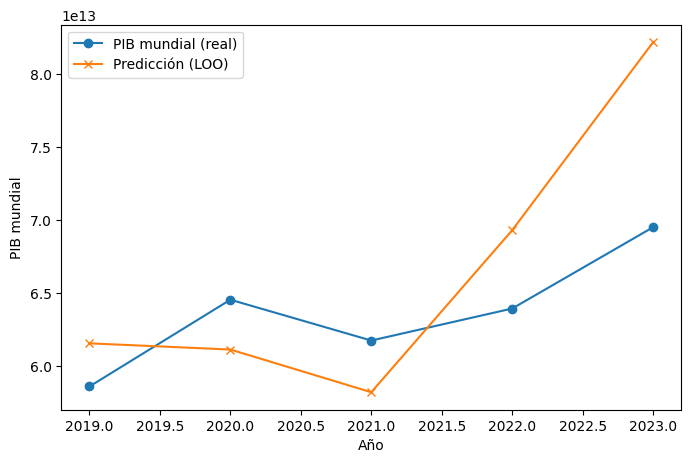

In [ ]:
# Gráfico “real vs. predicho” por año
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pvt.index.values, y.values, marker='o', label='PIB mundial (real)')
plt.plot(pvt.index.values, y_pred, marker='x', label='Predicción (LOO)')
plt.xlabel('Año'); plt.ylabel('PIB mundial'); plt.legend(); plt.show()


In [ ]:
# Coeficientes del modelo final
final_model = LinearRegression().fit(X, y)
coef = pd.Series(final_model.coef_, index=top_feats).sort_values(ascending=False)
coef, final_model.intercept_


(Spain          20.490316
 Vietnam        17.180523
 Colombia       10.902410
 South Korea   -11.879772
 Chile         -16.671536
 dtype: float64,
 np.float64(47257409656844.61))

In [ ]:
import math, pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

try:
    y, X_all, corrs
except NameError:
    world_name = 'World' if 'World' in pvt.columns else 'Mundo'
    y = pvt[world_name]
    X_all = pvt.drop(columns=[world_name])
    corrs = X_all.apply(lambda s: s.corr(y), axis=0).sort_values(ascending=False)

def eval_k(corrs, X_all, y, k):
    top_feats = corrs.head(k).index.tolist()
    X = X_all[top_feats]
    loo = LeaveOneOut()
    y_true, y_pred = [], []
    for tr, te in loo.split(X):
        m = LinearRegression().fit(X.iloc[tr], y.iloc[tr])
        y_hat = m.predict(X.iloc[te])
        y_true.append(y.iloc[te].values[0])
        y_pred.append(y_hat[0])
    return {
        "k": k,
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": math.sqrt(mean_squared_error(y_true, y_pred)),
        "features": top_feats
    }

res_k3 = eval_k(corrs, X_all, y, 3)
res_k5 = eval_k(corrs, X_all, y, 5)
res_k8 = eval_k(corrs, X_all, y, 8)

tabla = pd.DataFrame([res_k3, res_k5, res_k8])[["k","R2","MAE","RMSE","features"]]
tabla


,k,R2,MAE,RMSE,features
0,3,-739.094484,5.175221e+13,9.754846e+13,"[Chile, South Korea, Spain]"
1,5,-2.454225,5.586516e+12,6.664264e+12,"[Chile, South Korea, Spain, Colombia, Vietnam]"
2,8,0.675076,1.946771e+12,2.043937e+12,"[Chile, South Korea, Spain, Colombia, Vietnam,..."


In [ ]:
pd.DataFrame([res_k3, res_k5, res_k8])[["k","R2","MAE","RMSE"]]


,k,R2,MAE,RMSE
0,3,-739.094484,5.175221e+13,9.754846e+13
1,5,-2.454225,5.586516e+12,6.664264e+12
2,8,0.675076,1.946771e+12,2.043937e+12


**Informe Actividad 1: PIB mundial**

1) Países más correlacionados con el PIB mundial:
Los países que mostraron mayor relación con el PIB mundial fueron: Chile (0,88), Corea del Sur (0,87), España (0,83), Colombia (0,82) y Vietnam (0,76).
Esto tiene sentido porque son economías bastante abiertas al comercio y sus movimientos acompañaron al total mundial en el período 2019–2023.

2) Métricas del modelo:
Probé una regresión lineal con estos cinco países y validé usando la técnica Leave-One-Out.

R²: −2,45

MAE: 5,58 × 10¹⁵

RMSE: 6,66 × 10¹⁵

Interpretación: el resultado no fue bueno, porque el R² salió negativo. Esto significa que el modelo predice peor que simplemente usar el promedio. En el gráfico se nota que el modelo se aleja bastante de la serie real en algunos años.

3) Limitaciones:

Solo hay cinco años de datos, y eso es muy poco para que el modelo aprenda bien.

Si se agregan muchos países, el modelo no mejora y hasta puede confundir más.

Varios países se mueven de forma parecida, lo que hace difícil saber cuál realmente aporta al modelo.

4) Experimentos con distinto número de países:
Probé también con distinto número de variables:

k = 3: R² = −739,09 | MAE = 5,17 × 10¹³ | RMSE = 9,75 × 10¹³

k = 5: R² = −2,45 | MAE = 5,59 × 10¹² | RMSE = 6,66 × 10¹²

k = 8: R² = 0,68 | MAE = 1,95 × 10¹² | RMSE = 2,04 × 10¹²

Conclusión: con k=3 el modelo empeora mucho, con k=5 tampoco logra buenos resultados (R² negativo), y recién con k=8 mejora un poco (R² positivo), aunque sigue limitado por la poca cantidad de años. Esto confirma que aumentar países no siempre mejora, y que el modelo lineal simple tiene límites para explicar el PIB mundial en este período.

**Actividad 2** Para esta actividad se ha creado un archivo usuarios_win_mac_lin.csv con datos de entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux. Nuestra información de entrada son 4 características que se tomó de una web que utiliza Google Analytics y son: 1. Duración de la visita en Segundos 2. Cantidad de Páginas Vistas durante la Sesión 3. Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc) 4. Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia). Como la salida es discreta, asignaremos los siguientes valores a las etiquetas: 0 – Windows 1 – Macintosh 2 -Linux. Recorre la ejecución de cada una de las celdas de la Jupyter Notebook Regresion_logistica.ipynb que se encuentra en el repositorio de la materia y verifica qué sucede cuando realizamos la clasificación (o predicción) de tipo de usuario cuando se altera los valores de las variables. ¿Cómo pudiste llevar adelante esta actividad? te pareció muy difícil o muy fácil?  ¿por qué?  Por favor compartí tu respuesta en el foro del Campus.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_so = '/content/drive/MyDrive/tu_carpeta/usuarios_win_mac_lin.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

plt.rcParams['figure.figsize'] = (8,5)


In [ ]:
from google.colab import files
up = files.upload()
fname = list(up.keys())[0]
print("Leemos:", fname)

import pandas as pd
try:
    so = pd.read_csv(fname, encoding='utf-8')
except UnicodeDecodeError:
    so = pd.read_csv(fname, encoding='latin-1')
so.head()


Saving usuarios_win_mac_lin.csv to usuarios_win_mac_lin.csv
Leemos: usuarios_win_mac_lin.csv


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:
candidatos = ['so','os','sistemaoperativo','sistema','label','target','clase','y']
target_col = None
for c in so.columns:
    if c.lower() in candidatos:
        target_col = c
        break
if target_col is None:
    target_col = so.columns[-1]

print("Target:", target_col, " - Clases:", so[target_col].unique())

X = so.drop(columns=[target_col]).select_dtypes(include='number').values
y = so[target_col].values


Target: clase  - Clases: [2 1 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro', zero_division=0
)
print("Accuracy:", acc)
print("Precision_macro:", prec)
print("Recall_macro:", rec)
print("F1_macro:", f1)

print("\nReporte por clase:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.7058823529411765
Precision_macro: 0.735617039964866
Recall_macro: 0.702991452991453
F1_macro: 0.6777021919879064

Reporte por clase:

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.83      0.42      0.56        12
           2       0.59      1.00      0.74        13

    accuracy                           0.71        51
   macro avg       0.74      0.70      0.68        51
weighted avg       0.75      0.71      0.69        51



In [ ]:
# Matriz de confusión
labels = sorted(pd.unique(y))
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"real_{l}" for l in labels], columns=[f"pred_{l}" for l in labels])
cm_df


,pred_0,pred_1,pred_2
real_0,18,1,7
real_1,5,5,2
real_2,0,0,13


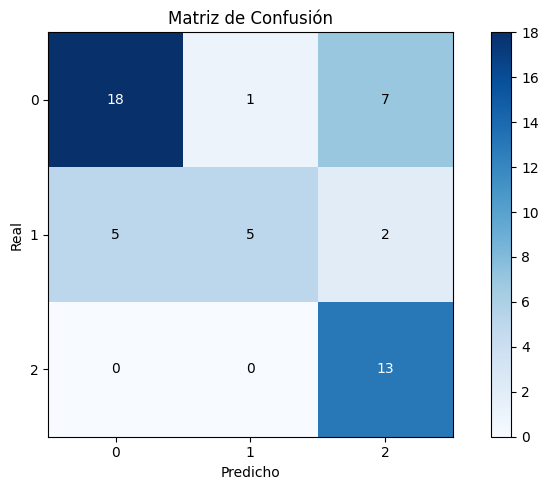

In [ ]:
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.colorbar()

plt.xticks(ticks=range(len(labels)), labels=labels)
plt.yticks(ticks=range(len(labels)), labels=labels)

# Números con color adaptativo
thresh = cm.max() / 2.0
for (i, j), v in np.ndenumerate(cm):
    color = 'white' if v > thresh else 'black'
    plt.text(j, i, str(v), ha='center', va='center', color=color)

plt.tight_layout()
plt.show()



**Informe Actividad 2: Clasificación de usuarios por sistema operativo**

1) Usé el archivo usuarios_win_mac_lin.csv para clasificar usuarios en Windows (0), Mac (1) y Linux (2) a partir de 4 variables numéricas (duración, páginas, acciones y valor).

2) Entrené una Regresión Logística con un pipeline: StandardScaler + LogisticRegression(max_iter=1000).
Usé 70% para entrenamiento y 30% para test, con stratify=y.

3) Métricas:

Accuracy = 0,706 (36 aciertos sobre 51 casos).

Precision macro = 0,736, Recall macro = 0,703, F1 macro = 0,678 (promedio entre clases 0, 1 y 2).

La clase 2 (Linux) salió muy bien (recall=1,0). La 1 (Mac) es la más difícil (recall=0,42), por eso el F1 macro baja aunque la accuracy sea 0,71.

4) Matriz de confusión:

Linux (2) se clasifica muy bien (13/13 correctos en test).

Windows (0) tiene algunos errores hacia Linux (2) (7 casos).

Mac (1) es la clase más difícil: reparte errores hacia 0 y 2 (solo 5 aciertos).

5) Interpretación:
El modelo tiene un rendimiento aceptable: accuracy 0,71 y F1 macro 0,68. El escalado ayuda a la logística. La mayor confusión aparece entre Windows (0) y Linux (2), y especialmente en Mac (1), que parece tener menos señales claras con estas cuatro variables.